In [22]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
# read file
out_dir = "output"
input_file_path = os.path.join(out_dir, "example-results.csv")
df_orig = pd.read_csv(input_file_path)

In [24]:
display(df_orig.describe())
display(df_orig.info())

,place,bib,chip_time,distance_miles,elevation_gain_ft,age,age_percentage,run_crew_name
count,1987.000000,1987.000000,0.0,1984.00000,1987.000000,1987.000000,1913.000000,0.0
mean,994.000000,1345.714645,NaN,96.89859,3473.678410,39.657272,64.844851,NaN
std,573.741812,739.498765,NaN,68.12651,5935.161086,9.189227,22.779092,NaN
min,1.000000,100.000000,NaN,0.10000,0.000000,6.000000,0.800000,NaN
25%,497.500000,705.500000,NaN,45.95000,322.500000,34.000000,51.200000,NaN
50%,994.000000,1333.000000,NaN,86.62950,1904.000000,39.000000,65.500000,NaN
75%,1490.500000,1975.000000,NaN,132.64000,4487.500000,45.000000,78.700000,NaN
max,1987.000000,2679.000000,NaN,538.05000,113343.000000,77.000000,599.700000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place              1987 non-null   int64  
 1   bib                1987 non-null   int64  
 2   name               1987 non-null   object 
 3   gender             1986 non-null   object 
 4   city               1974 non-null   object 
 5   state              1958 non-null   object 
 6   country            1987 non-null   object 
 7   clock_time         1987 non-null   object 
 8   chip_time          0 non-null      float64
 9   distance_miles     1984 non-null   float64
 10  progress           1987 non-null   object 
 11  elevation_gain_ft  1987 non-null   float64
 12  pace               1916 non-null   object 
 13  age                1987 non-null   int64  
 14  age_percentage     1913 non-null   float64
 15  run_crew_name      0 non-null      float64
dtypes: float64(5), int64(3),

None

In [25]:
# Make changes to dataframe for viewing elevation data

# sort by elevation and add "elevation_place"
df = df_orig.copy()
df.sort_values("elevation_gain_ft", ascending=False, inplace=True)
df["elevation_place"] = [i for i in range(1, len(df) + 1)]

# select columns I care most about and reorder them
columns = ["place", "elevation_place", "elevation_gain_ft", "distance_miles", "name", "gender", "city", "state", "country", "pace", "clock_time", "age"]
df = df[columns]

In [26]:
# Display the top 15 runners by elevation
display(df.iloc[:15])

,place,elevation_place,elevation_gain_ft,distance_miles,name,gender,city,state,country,pace,clock_time,age
2,3,1,113343.0,464.700,Pippin Hagrid,F,Hagerstown,MD,US,13:59,108:17:20,45
60,61,2,84715.0,252.918,Frodo Diggory,M,Baltimore,MD,US,17:09,72:19:00,29
8,9,3,64647.0,367.425,Saruman Snape,M,Baltimore,MD,US,13:51,84:50:36,36
124,125,4,55562.0,208.487,Galadriel Longbottom,F,Baltimore,MD,US,12:56,44:57:16,33
65,66,5,49204.0,247.740,Sauron Snape,M,Catonsville,MD,US,16:25,67:47:27,32
178,179,6,44356.0,190.670,Galadriel Diggory,M,Golden,CO,US,10:32,33:27:24,38
43,44,7,43384.0,269.436,Legolas Dursley,M,Catonsville,MD,US,12:25,55:43:57,43
32,33,8,42346.0,283.410,Gandalf Granger,M,Colorado Springs,CO,US,11:29,54:15:36,53
26,27,9,37119.0,288.649,Galadriel Malfoy,M,Reisterstown,MD,US,10:03,48:19:23,32
311,312,10,36264.0,162.460,Pippin Malfoy,M,Santa Cruz,CA,US,15:31,42:01:02,47


## Elevation gain histograms

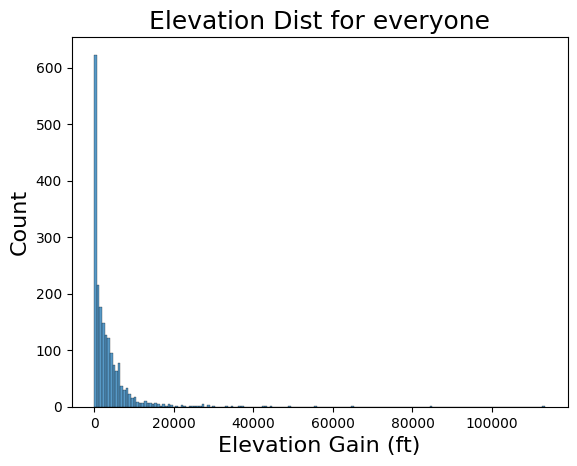

In [27]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="elevation_gain_ft", ax=ax)
ax.set_title("Elevation Dist for everyone", fontsize=18)
ax.set_xlabel("Elevation Gain (ft)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-elevation-distribution-all.png")
fig.savefig(out_file_path, dpi=300)

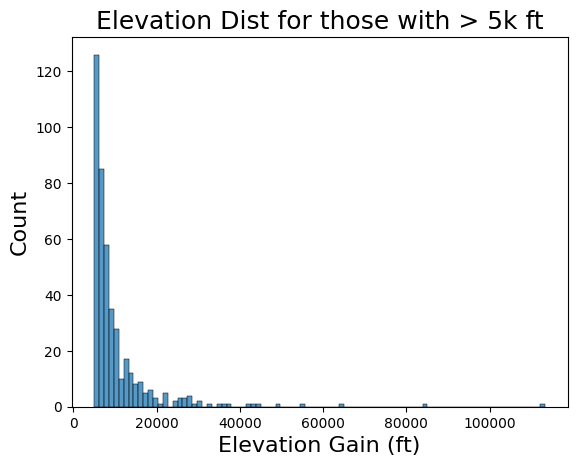

In [28]:
fig, ax = plt.subplots()
ax = sns.histplot(df[df["elevation_gain_ft"] > 5000], x="elevation_gain_ft", ax=ax)
ax.set_title("Elevation Dist for those with > 5k ft", fontsize=18)
ax.set_xlabel("Elevation Gain (ft)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-elevation-distribution-gt-5k-ft.png")
fig.savefig(out_file_path, dpi=300)

## Distance

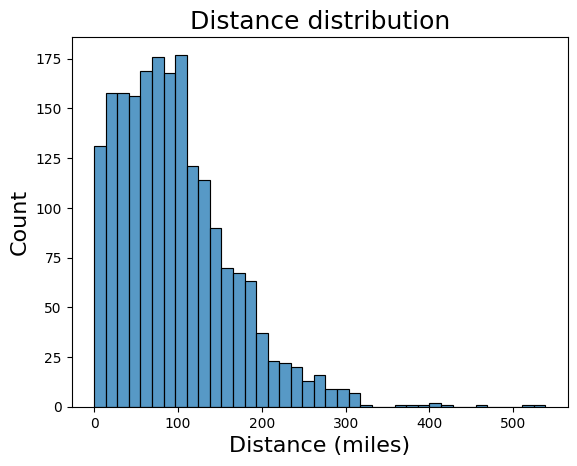

In [29]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="distance_miles", ax=ax)
ax.set_title("Distance distribution", fontsize=18)
ax.set_xlabel("Distance (miles)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-distance-distribution.png")
fig.savefig(out_file_path, dpi=300)

## Age

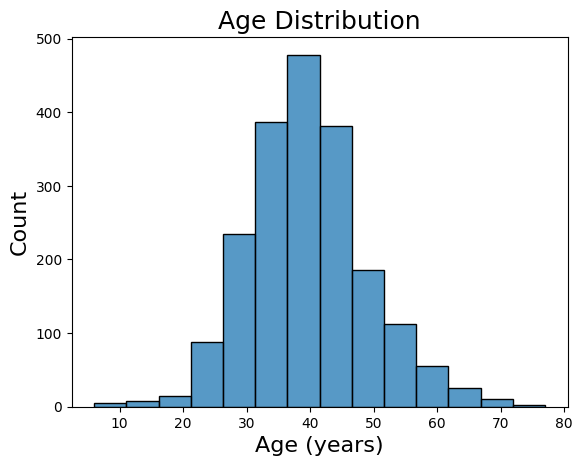

In [30]:
fig, ax = plt.subplots()
ax = sns.histplot(df, x="age", binwidth=5)
ax.set_title("Age Distribution", fontsize=18)
ax.set_xlabel("Age (years)", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

out_file_path = os.path.join(out_dir, "output-age-distribution.png")
fig.savefig(out_file_path, dpi=300)

## Location

In [31]:
# https://countrycode.org/
mapping = {
    "US" : "United States",
    "GB" : "Great Britain",
    "CA" : "Canada",
    "AU" : "Australia",
    "DE" : "Germany",
    "AL" : "Albania",
    "CO" : "Colombia",
    "FR" : "France",
    "IE" : "Ireland",
    "IL" : "Israel",
    "CN" : "China",
    "JP" : "Japan",
    "KE" : "Kenya",
    "PR" : "Puerto Rico",
    "KR" : "South Korea",
    "PT" : "Portugal",
    "SE" : "Sweden",
    "SG" : "Singapore",
    "VE" : "Venezuala"
}

df_country = pd.DataFrame(df[["country"]].value_counts(dropna=False))

#df_country["country_full_name"] = df_country["country"].map(mapping)
display(df_country)
df_country.columns

,count
country,
US,1950
GB,12
CA,6
AU,3
DE,2
AL,1
CO,1
FR,1
IE,1


Index(['count'], dtype='object')

In [32]:
pd.DataFrame(df["country"].value_counts(dropna=False))

,count
country,
US,1950
GB,12
CA,6
AU,3
DE,2
IE,1
CN,1
PR,1
PT,1


In [33]:
df_us = df[df["country"] == "US"]
df_state = pd.DataFrame(df_us[["state"]].value_counts(dropna=False))
total = len(df)
df_state["fraction"] = df_state["count"] / total
display(df_state)

,count,fraction
state,,
MD,269,0.135380
NY,207,0.104177
TX,151,0.075994
PA,121,0.060896
CA,121,0.060896
VA,117,0.058883
NJ,89,0.044791
FL,82,0.041268
MA,81,0.040765


# Gender

In [34]:
df_gender = pd.DataFrame(df[["gender"]].value_counts(dropna=False))
total = len(df)
df_gender["fraction"] = df_gender["count"] / total
display(df_gender)

,count,fraction
gender,,
F,997,0.501761
M,987,0.496729
X,2,0.001007
NaN,1,0.000503
